# Multiomics modeling

Let's look at the paper *"Multiomics modeling of the immunome, transcriptome, microbiome, proteome and metabolome adaptations during human pregnancy"* by **Ghaemi et al. 2019** (`task1_multiomics_ghaemi2019multiomics.pdf`).
The idea is to use different modalities (measurements collected from the immune system, microbiome, etc.) to characterize biological changes during pregnancy.
This includes whether we can predict the gestational age of a mother solely based on the collected biomarkers.

**Note**: There is no need to get accquainted with multiomics modeling, at least for this exercise. In the end, this is just a regular data science task :)

## Load the data

Load the data from `multiomics_data.pickle` using `pickle`. You will get a [pandas](https://pandas.pydata.org/docs/user_guide/10min.html) DataFrame containing preprocessed data from the paper (the original data from their paper is a bit messy). The data contains several meta attributes as well as the different modalities.

Meta attributes include:

* `Sex`: sex of the baby
* `timepoint`: 1-3 correspond to the three trimesters, 4 corresponds to postpartum
* `gestational_age`: time of sampling

Modalites are:

* `cellfree_rna`
* `metabolomics`
* `microbiome`
* `plasma_luminex`
* `serum_luminex`
* `immune_system`
* `plasma_somalogic`

For more details pleaase see the paper.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
from sklearn.model_selection import LeaveOneGroupOut

In [7]:
# code for loading the data

import numpy as np
import pickle

with open("/content/drive/MyDrive/bckrlab-exercises/task1_multiomics_data.pickle", "rb") as file:
    data_multiomics = pickle.load(file)

data_multiomics.head(68)

Training/Validation Gates ID       MRN Study Subject ID Number     Sex  \
                                                                            
0                    T  PTLG002  16661779                   10565    Male   
1                    T  PTLG002  16661779                   10565    Male   
2                    T  PTLG002  16661779                   10565    Male   
3                    T  PTLG002  16661779                   10565    Male   
4                    T  PTLG004  23587868                   10603  Female   
..                 ...      ...       ...                     ...     ...   
63                   T  PTLG029  40310948                   10631  Female   
64                   T  PTLG016  20328266                   30101    Male   
65                   T  PTLG016  20328266                   30101    Male   
66                   T  PTLG016  20328266                   30101    Male   
67                   T  PTLG016  20328266                   30101    Male   

   sex_bin timepoint gestational_age cellfree_rna                ...  \
                                        0_C2orf76      1_ACTL10  ...   
0        1         1              11     0.312437 -1.892930e-16  ...   
1        1         2              18     0.312437 -1.892930e-16  ...   
2        1         3              32     0.312437 -1.892930e-16  ...   
3        1         4              45     0.312437 -1.892930e-16  ...   
4        0         1              11     5.204209  1.734736e+00  ...   
..     ...       ...             ...          ...           ...  ...   
63       0         4              46     0.312437 -1.892930e-16  ...   
64       1         1              10     0.000000  0.000000e+00  ...   
65       1         2              19     0.000000  0.000000e+00  ...   
66       1         3              31     0.000000  0.000000e+00  ...   
67       1         4              47     0.000000  0.000000e+00  ...   

   plasma_somalogic                                               \
        1290_UBE2G2 1291_TAGLN2 1292_ATP5O 1293_POMC 1294_CRYZL1   
0            4804.4      2233.0     3610.9     715.8       151.4   
1            4086.0      2160.5     2260.4     825.2       161.0   
2            4328.0      1818.4     2445.2    1241.8       194.6   
3            3442.4      2661.4     3879.2     703.6       153.7   
4            4261.9      1804.6     1470.6     526.8       163.0   
..              ...         ...        ...       ...         ...   
63           4391.7      2458.9     3245.9     582.9       243.3   
64           3622.7      2625.1     3154.4     414.9       164.2   
65           5090.5      2206.1     2860.7     706.7       176.6   
66           5043.6      1894.1     1905.7     938.7       211.6   
67           4296.6      2278.2     2777.4     668.0       165.0   

                                                             
   1295_SERPINF1 1296_CTSF 1297_FTCD 1298_USP25 1299_PLXNB2  
0        37885.8    1479.1    3261.8      561.3      3227.0  
1        41821.5    1465.1    1839.8      597.8      3366.0  
2        45526.1    1428.3    3057.2      625.7      8703.7  
3        36862.5    1063.6    7339.7      593.2      2918.9  
4        38938.3    1170.1    1036.8      552.8      3457.1  
..           ...       ...       ...        ...         ...  
63       33475.3    1322.6   19361.7     1750.4      3012.4  
64       40142.8    1417.0    2424.4      725.2      3066.3  
65       38453.5    1811.2    1737.5      737.2      3340.8  
66       47249.5    2521.8    1026.5      667.2      5981.0  
67       45130.9    1781.2    5904.1      697.3      3246.2  

[68 rows x 61274 columns]

In [8]:
import pandas as pd

# Assuming data_multiomics is your DataFrame with a MultiIndex and 'feature' is the feature you want to check
feature = 'gestational_age'

if feature in data_multiomics['immune_system'].columns.get_level_values(0):
    print(f"The feature '{feature}' is present in the DataFrame.")
else:
    print(f"The feature '{feature}' is not present in the DataFrame.")


The feature 'gestational_age' is not present in the DataFrame.


In [10]:
unique_values = data_multiomics['Gates ID'].unique()

print(unique_values)

['PTLG002' 'PTLG004' 'PTLG003' 'PTLG005' 'PTLG007' 'PTLG010' 'PTLG008'
 'PTLG009' 'PTLG015' 'PTLG012' 'PTLG019' 'PTLG018' 'PTLG020' 'PTLG022'
 'PTLG024' 'PTLG029' 'PTLG016']


In [11]:
logo = LeaveOneGroupOut()

In [12]:
for train_indices, test_indices in logo.split(data_multiomics, groups=data_multiomics['Gates ID']):
    # Split the data into training and testing sets for the outer layer
    train_data = data_multiomics.iloc[train_indices]
    test_data = data_multiomics.iloc[test_indices]

In [13]:
test_data

Training/Validation Gates ID       MRN Study Subject ID Number     Sex  \
                                                                            
60                   T  PTLG029  40310948                   10631  Female   
61                   T  PTLG029  40310948                   10631  Female   
62                   T  PTLG029  40310948                   10631  Female   
63                   T  PTLG029  40310948                   10631  Female   

   sex_bin timepoint gestational_age cellfree_rna                ...  \
                                        0_C2orf76      1_ACTL10  ...   
60       0         1              11     0.312437 -1.892930e-16  ...   
61       0         2              15     0.312437 -1.892930e-16  ...   
62       0         3              27     0.312437 -1.892930e-16  ...   
63       0         4              46     0.312437 -1.892930e-16  ...   

   plasma_somalogic                                               \
        1290_UBE2G2 1291_TAGLN2 1292_ATP5O 1293_POMC 1294_CRYZL1   
60           4029.3      2285.5     2563.8     462.1       202.3   
61           4610.7      1995.0     1749.4     522.8       178.8   
62           5796.4      1696.2     1745.6     783.6       246.4   
63           4391.7      2458.9     3245.9     582.9       243.3   

                                                             
   1295_SERPINF1 1296_CTSF 1297_FTCD 1298_USP25 1299_PLXNB2  
60       51835.2    1655.0    1542.5      616.2      3608.9  
61       39947.8    1871.7    2654.7      650.6      3851.5  
62       43006.6    2162.3    2808.7     3589.2      5220.1  
63       33475.3    1322.6   19361.7     1750.4      3012.4  

[4 rows x 61274 columns]

In [14]:
train_data

Training/Validation Gates ID       MRN Study Subject ID Number     Sex  \
                                                                            
0                    T  PTLG002  16661779                   10565    Male   
1                    T  PTLG002  16661779                   10565    Male   
2                    T  PTLG002  16661779                   10565    Male   
3                    T  PTLG002  16661779                   10565    Male   
4                    T  PTLG004  23587868                   10603  Female   
..                 ...      ...       ...                     ...     ...   
59                   T  PTLG024  10806180                   10629    Male   
64                   T  PTLG016  20328266                   30101    Male   
65                   T  PTLG016  20328266                   30101    Male   
66                   T  PTLG016  20328266                   30101    Male   
67                   T  PTLG016  20328266                   30101    Male   

   sex_bin timepoint gestational_age cellfree_rna                ...  \
                                        0_C2orf76      1_ACTL10  ...   
0        1         1              11     0.312437 -1.892930e-16  ...   
1        1         2              18     0.312437 -1.892930e-16  ...   
2        1         3              32     0.312437 -1.892930e-16  ...   
3        1         4              45     0.312437 -1.892930e-16  ...   
4        0         1              11     5.204209  1.734736e+00  ...   
..     ...       ...             ...          ...           ...  ...   
59       1         4              45     0.000000  0.000000e+00  ...   
64       1         1              10     0.000000  0.000000e+00  ...   
65       1         2              19     0.000000  0.000000e+00  ...   
66       1         3              31     0.000000  0.000000e+00  ...   
67       1         4              47     0.000000  0.000000e+00  ...   

   plasma_somalogic                                               \
        1290_UBE2G2 1291_TAGLN2 1292_ATP5O 1293_POMC 1294_CRYZL1   
0            4804.4      2233.0     3610.9     715.8       151.4   
1            4086.0      2160.5     2260.4     825.2       161.0   
2            4328.0      1818.4     2445.2    1241.8       194.6   
3            3442.4      2661.4     3879.2     703.6       153.7   
4            4261.9      1804.6     1470.6     526.8       163.0   
..              ...         ...        ...       ...         ...   
59           5171.6      1899.5     9792.4     555.9       158.1   
64           3622.7      2625.1     3154.4     414.9       164.2   
65           5090.5      2206.1     2860.7     706.7       176.6   
66           5043.6      1894.1     1905.7     938.7       211.6   
67           4296.6      2278.2     2777.4     668.0       165.0   

                                                             
   1295_SERPINF1 1296_CTSF 1297_FTCD 1298_USP25 1299_PLXNB2  
0        37885.8    1479.1    3261.8      561.3      3227.0  
1        41821.5    1465.1    1839.8      597.8      3366.0  
2        45526.1    1428.3    3057.2      625.7      8703.7  
3        36862.5    1063.6    7339.7      593.2      2918.9  
4        38938.3    1170.1    1036.8      552.8      3457.1  
..           ...       ...       ...        ...         ...  
59       48007.9    1734.8   31000.1      808.0      3203.1  
64       40142.8    1417.0    2424.4      725.2      3066.3  
65       38453.5    1811.2    1737.5      737.2      3340.8  
66       47249.5    2521.8    1026.5      667.2      5981.0  
67       45130.9    1781.2    5904.1      697.3      3246.2  

[64 rows x 61274 columns]

In [15]:
data_multiomics_features = data_multiomics.columns.tolist()
print(data_multiomics_features)

[('Training/Validation', ''), ('Gates ID', ''), ('MRN', ''), ('Study Subject ID Number', ''), ('Sex', ''), ('sex_bin', ''), ('timepoint', ''), ('gestational_age', ''), ('cellfree_rna', '0_C2orf76'), ('cellfree_rna', '1_ACTL10'), ('cellfree_rna', '2_CEP135'), ('cellfree_rna', '3_RP11-613M10.6'), ('cellfree_rna', '4_NDUFB5P1'), ('cellfree_rna', '5_MIIP'), ('cellfree_rna', '6_RP11-98I9.4'), ('cellfree_rna', '7_C20orf144'), ('cellfree_rna', '8_RP11-485G7.6'), ('cellfree_rna', '9_CCDC86'), ('cellfree_rna', '10_AC004076.9'), ('cellfree_rna', '11_TRIM6'), ('cellfree_rna', '12_SBF1P1'), ('cellfree_rna', '13_NKD1'), ('cellfree_rna', '14_GNL3'), ('cellfree_rna', '15_ERICH6'), ('cellfree_rna', '16_HYDIN2'), ('cellfree_rna', '17_RP11-209M4.1'), ('cellfree_rna', '18_RP11-999E24.3'), ('cellfree_rna', '19_TM9SF1'), ('cellfree_rna', '20_CEP70'), ('cellfree_rna', '21_FAM187B2P'), ('cellfree_rna', '22_RP11-306O13.1'), ('cellfree_rna', '23_RP11-462G12.4'), ('cellfree_rna', '24_ZNF225'), ('cellfree_rna', 

In [16]:
# look at the immune system
data_multiomics["immune_system"].head(15)

,0_Bcells,1_CD16+CD56-NKcells,2_CD4+Tcells_mem,3_CD4+Tcells_naive,4_CD4+Tcells,5_CD45RA+Tregs,6_CD45RA-Tregs,7_CD56+CD16-NKcells,8_CD7+NKcells,9_CD8+Tcells_mem,...,524_M-MDSC_STAT5_Unstim,525_mDCs_STAT5_Unstim,526_ncMCs_STAT5_Unstim,527_pDCs_STAT5_Unstim,528_Tbet+CD4+Tcells_mem_STAT5_Unstim,529_Tbet+CD4+Tcells_naive_STAT5_Unstim,530_Tbet+CD8+Tcells_mem_STAT5_Unstim,531_Tbet+CD8+Tcells_naive_STAT5_Unstim,532_TCRgd+Tcells_STAT5_Unstim,533_Tregs_STAT5_Unstim
0,0.053164,0.054978,0.297875,0.136289,0.445832,0.002570,0.013848,0.007052,0.070836,0.118884,...,0.998954,0.953637,1.082629,0.808610,0.504269,0.757424,0.462045,0.454665,0.443859,0.529431
1,0.052857,0.069794,0.279917,0.140350,0.430839,0.002470,0.010923,0.004759,0.080245,0.127831,...,0.930847,0.822618,0.931126,0.728738,0.613059,0.852393,0.506981,0.474408,0.491691,0.574133
2,0.053202,0.050829,0.277997,0.187659,0.479078,0.003473,0.013359,0.005302,0.063781,0.104513,...,1.077824,0.970954,1.011011,0.749277,0.752882,0.813249,0.560379,0.481862,0.505706,0.640245
3,0.049906,0.090496,0.266336,0.156263,0.432904,0.003071,0.014459,0.004318,0.101386,0.115243,...,0.976888,0.918164,1.028114,0.790166,0.505349,0.648406,0.464522,0.445444,0.438285,0.573058
4,0.103067,0.004128,0.162746,0.103950,0.270840,0.003198,0.007988,0.007153,0.090763,0.057064,...,0.890405,0.800468,1.067789,0.563615,0.464563,1.004497,0.378557,0.423530,0.332368,0.447904
5,0.108153,0.006318,0.211465,0.098454,0.313554,0.002492,0.009398,0.006683,0.110264,0.072928,...,0.898902,0.727711,0.466587,0.489486,0.455516,0.909593,0.354005,0.371309,0.311826,0.387397
6,0.114545,0.008914,0.176394,0.103649,0.283515,0.002531,0.006116,0.008661,0.104731,0.074854,...,0.960519,0.875085,0.646729,0.525426,0.467405,1.125910,0.375940,0.466304,0.333018,0.445688
7,0.084578,0.007421,0.200144,0.100440,0.304310,0.002917,0.007605,0.008115,0.132504,0.079806,...,0.868936,0.735379,0.481496,0.512716,0.324728,0.829836,0.313406,0.322156,0.265301,0.344929
8,0.137333,0.061311,0.274281,0.139593,0.422238,0.004931,0.013510,0.004393,0.075063,0.069362,...,0.944868,0.821947,0.907417,0.604255,0.449490,0.493848,0.369439,0.352433,0.312076,0.388583
9,0.119092,0.060294,0.277815,0.153793,0.440762,0.006079,0.015419,0.005696,0.073532,0.069436,...,1.069505,0.932132,1.041674,0.652331,0.468973,0.443834,0.390911,0.373031,0.321187,0.418696


## Tasks

### Your experience

Before we start, please briefly describe your experience in data science and machine learning (5 sentences).

My master's thesis was in timeseries analysis and stock market prediction using deep learning. I am currently involve in signal processing and heart abnormality detection using deep learning. I alse did some projects in Image captioning and texzt mining.
I am familiar with different machine learning topics, with a solid mathematical background.

### Gestational Age

1. **Predict `gestational_age`** using the `immune_system` modality using at least two models (e.g., elastic net and support vector machines)

2. **Evaluate** your models using a measure that you think fits best. If it is a different measure than in the paper, please briefly explain why.

3. For your best model, **plot the model predictions** similar to **Figure 2D**.


**Hint:** To train and evaluate models, you can use [scikit-learn](https://scikit-learn.org/stable/tutorial/basic/tutorial.html).

**Figure 2D:**<br/>
<img src="assets/task1_multiomics_fig2d.jpeg">

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
from sklearn.model_selection import LeaveOneGroupOut

In [18]:
X = data_multiomics["immune_system"]

In [19]:
Y = data_multiomics["gestational_age"]

In [20]:
for train_indices, test_indices in logo.split(X, groups=data_multiomics['Gates ID']):
    # Split the data into training and testing sets for the outer layer
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
print('##########################################################################')
for train_indices, test_indices in logo.split(Y, groups=data_multiomics['Gates ID']):
    # Split the data into training and testing sets for the outer layer
    y_train = Y.iloc[train_indices]
    y_test = Y.iloc[test_indices]

##########################################################################


In [21]:
# Elastic Net model
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
elastic_net_predictions = elastic_net.predict(X_test)

# SVM model
svm = SVC()
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)

In [22]:
# Evaluate the models
elastic_net_mae = mean_absolute_error(y_test, elastic_net_predictions)

svm_mae = mean_absolute_error(y_test, svm_predictions)

In [23]:
print("Elastic Net MAE:", elastic_net_mae)

print("SVM MAE:", svm_mae)

Elastic Net MAE: 9.880809820430828
SVM MAE: 13.75


The explanation of Using MAE as the measure:

In the above code, the Mean Absolute Error (MAE) is utilized as the evaluation measure for both Elastic Net and SVM models due to the following reasons:

MAE provides a straightforward interpretation since it represents the average absolute difference between predicted and actual data. As a result, it directly shows the average magnitude of gestational age as a target variable.

Compared with other measures, MAE is less sensitive to outliers since it considers the absolute difference that extreme values of the dataset affect it less. Therefore, it is more robust.

Minimizing MAE while training the model helps find a model that provides accurate predictions with less emphasis on the outlier. Therefore, MAE can be used as a loss function that measures the dissimilarity between predicted and actual values.

In predicting gestational age, the focus is on accurately forecasting the duration. Since MAE directly reflects the average error, it can be crucial for decision-making.


Interpreting the values:

Elastic Net MAE: 9.880809820430827
This means that, on average, the predictions made by the Elastic Net model have an absolute difference of approximately 9.88 from the actual target values. The lower the MAE, the better the model's predictive performance. Therefore, a lower value indicates that the Elastic Net model is performing relatively well in terms of accuracy.

SVM MAE: 11.636792951760633
For the SVM model, the MAE is approximately 11.64. This indicates that, on average, the predictions made by the SVM model have an absolute difference of around 11.64 from the actual target values. Comparing this value to the Elastic Net MAE, it suggests that the SVM model has a slightly higher average prediction error compared to the Elastic Net model.

Therefore, based on the MAE alone, the Elastic Net model appears to perform better in terms of accuracy or precision compared to the SVM model.

### Sex of the baby

1. Try using a neural network in Tensorflow or PyTorch to predict the sex of the baby.
2. Try to optimize the network the bast you can (don't spend too much time on this though).

In [58]:
# Changing the labels of sex feature from Male and Female to 0 and 1
mapping = {'Male': 0, 'Female': 1}
data_multiomics['Sex'] = data_multiomics['Sex'].map(mapping)

In [25]:
data_multiomics.head(60)

Training/Validation Gates ID       MRN Study Subject ID Number Sex sex_bin  \
                                                                                
0                    T  PTLG002  16661779                   10565   0       1   
1                    T  PTLG002  16661779                   10565   0       1   
2                    T  PTLG002  16661779                   10565   0       1   
3                    T  PTLG002  16661779                   10565   0       1   
4                    T  PTLG004  23587868                   10603   1       0   
5                    T  PTLG004  23587868                   10603   1       0   
6                    T  PTLG004  23587868                   10603   1       0   
7                    T  PTLG004  23587868                   10603   1       0   
8                    T  PTLG003  16159071                   10604   1       0   
9                    T  PTLG003  16159071                   10604   1       0   
10                   T  PTLG003  16159071                   10604   1       0   
11                   T  PTLG003  16159071                   10604   1       0   
12                   T  PTLG005  29032406                   10607   0       1   
13                   T  PTLG005  29032406                   10607   0       1   
14                   T  PTLG005  29032406                   10607   0       1   
15                   T  PTLG005  29032406                   10607   0       1   
16                   T  PTLG007  23764350                   10609   1       0   
17                   T  PTLG007  23764350                   10609   1       0   
18                   T  PTLG007  23764350                   10609   1       0   
19                   T  PTLG007  23764350                   10609   1       0   
20                   T  PTLG010  29201514                   10613   1       0   
21                   T  PTLG010  29201514                   10613   1       0   
22                   T  PTLG010  29201514                   10613   1       0   
23                   T  PTLG010  29201514                   10613   1       0   
24                   T  PTLG008  19071927                   10614   0       1   
25                   T  PTLG008  19071927                   10614   0       1   
26                   T  PTLG008  19071927                   10614   0       1   
27                   T  PTLG008  19071927                   10614   0       1   
28                   T  PTLG009  19372101                   10615   1       0   
29                   T  PTLG009  19372101                   10615   1       0   
30                   T  PTLG009  19372101                   10615   1       0   
31                   T  PTLG009  19372101                   10615   1       0   
32                   T  PTLG015  23528359                   10616   1       0   
33                   T  PTLG015  23528359                   10616   1       0   
34                   T  PTLG015  23528359                   10616   1       0   
35                   T  PTLG015  23528359                   10616   1       0   
36                   T  PTLG012  29840147                   10619   0       1   
37                   T  PTLG012  29840147                   10619   0       1   
38                   T  PTLG012  29840147                   10619   0       1   
39                   T  PTLG012  29840147                   10619   0       1   
40                   T  PTLG019  29870508                   10621   0       1   
41                   T  PTLG019  29870508                   10621   0       1   
42                   T  PTLG019  29870508                   10621   0       1   
43                   T  PTLG019  29870508                   10621   0       1   
44                   T  PTLG018  60072675                   10622   0       1   
45                   T  PTLG018  60072675                   10622   0       1   
46                   T  PTLG018  60072675                   10622   0       1   
47                   T  PTLG018  6

In [26]:
def concatenate_rows(group):
    return pd.Series(group.values.flatten())

# Sort the DataFrame by the Gates ID column
data_multiomics.sort_values('Gates ID', inplace=True)

# Group the rows by the Gates ID and apply the concatenate_rows function
concatenated_data = data_multiomics.groupby('Gates ID').apply(concatenate_rows).reset_index(drop=False)

# Reset the index of the concatenated DataFrame
concatenated_data.reset_index(drop=True, inplace=True)

In [27]:
concatenated_data

,Gates ID,0,1,2,3,4,5,6,7,8,...,245086,245087,245088,245089,245090,245091,245092,245093,245094,245095
0,PTLG002,T,PTLG002,16661779,10565,0,1,1,11,0.312437,...,3442.400,2661.400,3879.200,703.600,153.700,36862.500,1063.600,7339.700,593.200,2918.900
1,PTLG003,T,PTLG003,16159071,10604,1,0,4,42,3.323430,...,5023.500,2108.800,2679.900,363.000,191.800,32384.000,1557.600,1950.000,701.300,3179.100
2,PTLG004,T,PTLG004,23587868,10603,1,0,3,27,0.000000,...,3500.800,2148.700,2311.400,540.100,207.400,38437.800,1199.900,1246.600,622.300,3341.500
3,PTLG005,T,PTLG005,29032406,10607,0,1,1,11,0.000000,...,3522.100,2087.000,2714.900,569.100,155.100,34343.200,1128.500,4105.500,736.300,3029.800
4,PTLG007,T,PTLG007,23764350,10609,1,0,4,43,0.000000,...,4489.400,2653.400,2189.100,655.900,176.300,35281.100,1944.200,3266.700,615.200,2916.100
5,PTLG008,T,PTLG008,19071927,10614,0,1,3,24,0.000000,...,3027.500,2289.900,3530.100,851.900,142.400,38422.100,1215.600,12117.600,558.400,4101.200
6,PTLG009,T,PTLG009,19372101,10615,1,0,1,8,2.126079,...,3935.800,2121.800,4309.900,728.400,161.700,35398.700,1226.200,15041.400,592.600,3278.800
7,PTLG010,T,PTLG010,29201514,10613,1,0,3,26,0.000000,...,2780.900,2133.200,2256.300,593.000,183.100,24624.900,1186.600,11141.700,608.000,3367.500
8,PTLG012,T,PTLG012,29840147,10619,0,1,2,15,0.000000,...,3841.000,1957.700,1343.500,518.900,162.900,33722.600,1809.000,8026.400,666.200,4300.800
9,PTLG015,T,PTLG015,23528359,10616,1,0,2,16,0.000000,...,5050.700,1601.000,2048.500,931.500,166.700,42570.500,2359.900,7093.400,662.700,3787.600


In [28]:
# Convert column names to strings
concatenated_data.columns = concatenated_data.columns.astype(str)
print(concatenated_data.columns)

Index(['Gates ID', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '245086', '245087', '245088', '245089', '245090', '245091', '245092',
       '245093', '245094', '245095'],
      dtype='object', length=245097)


In [29]:
# Drop the unwanted columns
columns_to_drop = ['Gates ID', '0', '1', '2', '3', '5', '6', '7']  # Example: drop columns with integer names

concatenated_data.drop(columns=columns_to_drop, inplace=True)


In [30]:
concatenated_data

,4,8,9,10,11,12,13,14,15,16,...,245086,245087,245088,245089,245090,245091,245092,245093,245094,245095
0,0,0.312437,-1.892930e-16,28.217854,-5.273559e-18,-6.106227e-18,10.107555,0.070008,-3.885781e-16,-4.113376e-16,...,3442.400,2661.400,3879.200,703.600,153.700,36862.500,1063.600,7339.700,593.200,2918.900
1,1,3.323430,0.000000e+00,13.293718,0.000000e+00,0.000000e+00,0.000000,3.323430,0.000000e+00,0.000000e+00,...,5023.500,2108.800,2679.900,363.000,191.800,32384.000,1557.600,1950.000,701.300,3179.100
2,1,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,78.170464,0.000000,0.000000e+00,0.000000e+00,...,3500.800,2148.700,2311.400,540.100,207.400,38437.800,1199.900,1246.600,622.300,3341.500
3,0,0.000000,0.000000e+00,15.269087,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,3522.100,2087.000,2714.900,569.100,155.100,34343.200,1128.500,4105.500,736.300,3029.800
4,1,0.000000,0.000000e+00,6.883971,0.000000e+00,0.000000e+00,34.419853,0.000000,0.000000e+00,0.000000e+00,...,4489.400,2653.400,2189.100,655.900,176.300,35281.100,1944.200,3266.700,615.200,2916.100
5,0,0.000000,0.000000e+00,63.625374,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,3027.500,2289.900,3530.100,851.900,142.400,38422.100,1215.600,12117.600,558.400,4101.200
6,1,2.126079,0.000000e+00,86.106183,0.000000e+00,0.000000e+00,12.756472,1.063039,0.000000e+00,0.000000e+00,...,3935.800,2121.800,4309.900,728.400,161.700,35398.700,1226.200,15041.400,592.600,3278.800
7,1,0.000000,0.000000e+00,10.900965,0.000000e+00,0.000000e+00,21.801929,0.000000,0.000000e+00,0.000000e+00,...,2780.900,2133.200,2256.300,593.000,183.100,24624.900,1186.600,11141.700,608.000,3367.500
8,0,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,3841.000,1957.700,1343.500,518.900,162.900,33722.600,1809.000,8026.400,666.200,4300.800
9,1,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,5050.700,1601.000,2048.500,931.500,166.700,42570.500,2359.900,7093.400,662.700,3787.600


In [31]:
# Handle missing values (if any)
concatenated_data = concatenated_data.fillna(0)
#test_X = test_X.fillna(0)
#val_X = val_X.fillna(0)

In [32]:
from sklearn.model_selection import LeaveOneGroupOut
# Assuming concatenated_data is a DataFrame
groups = np.arange(concatenated_data.shape[0])
logo = LeaveOneGroupOut()

# Splitting the data into train, validation, and test sets
for train_index, test_index in logo.split(concatenated_data, groups=groups):
    train_data, val_data = concatenated_data.iloc[train_index], concatenated_data.iloc[test_index]
    break  # Stop after the first iteration to use the first group as validation

# Splitting the remaining training data into training and testing data
train_data, test_data = train_test_split(train_data, test_size=0.1, random_state=42)


In [33]:
train_y = train_data['4']

In [34]:
test_y = test_data['4']

In [35]:
val_y = val_data['4']

In [36]:
train_X = train_data.drop('4', axis=1)

In [37]:
test_X = test_data.drop('4', axis=1)

In [38]:
val_X = val_data.drop('4', axis=1)

In [39]:
# Identify categorical columns
categorical_cols = []
for col in train_X.columns:
    if train_X[col].dtype == 'object':  # Check if the data type is object (string)
        categorical_cols.append(col)

# Print the categorical columns
print("Categorical columns:", categorical_cols)

Categorical columns: ['61274', '61275', '122548', '122549', '183822', '183823']


In [40]:
train_X = train_X.drop(categorical_cols, axis=1)

In [41]:
train_X.shape

(14, 245082)

In [42]:
test_X = test_X.drop(categorical_cols, axis=1)

In [43]:
val_X = val_X.drop(categorical_cols, axis=1)

In [44]:
val_X.shape

(1, 245082)

In [45]:
train_X = np.array(train_X)

In [46]:
test_X = np.array(test_X)

In [47]:
val_X = np.array(val_X)

In [48]:
train_y = np.array(train_y)

In [49]:
test_y = np.array(test_y)

In [50]:
val_y = np.array(val_y)

Epoch: 1, Train Loss: 535.5614842006138, Val Loss: 0.0
Epoch: 2, Train Loss: 293.39356994628906, Val Loss: 0.0
Epoch: 3, Train Loss: 129.90245710100447, Val Loss: 0.0
Epoch: 4, Train Loss: 121.4860435702971, Val Loss: 235.0751495361328
Epoch: 5, Train Loss: 92.66356604439872, Val Loss: 314.5269470214844
Epoch: 6, Train Loss: 76.63333238874164, Val Loss: 196.5513916015625
Epoch: 7, Train Loss: 157.96827479771204, Val Loss: 0.0
Epoch: 8, Train Loss: 158.9082804449967, Val Loss: 0.0
Epoch: 9, Train Loss: 157.48428445309816, Val Loss: 748.5579833984375
Epoch: 10, Train Loss: 104.87580871582031, Val Loss: 201.18455505371094
Epoch: 11, Train Loss: 110.15534319196429, Val Loss: 0.0006214833119884133
Epoch: 12, Train Loss: 184.50092424665178, Val Loss: 434.9169616699219
Epoch: 13, Train Loss: 13.49436024257115, Val Loss: 72.95285034179688
Epoch: 14, Train Loss: 35.7134427343096, Val Loss: 334.4650573730469
Epoch: 15, Train Loss: 34.35604640415737, Val Loss: 330.2649230957031
Epoch: 16, Train L

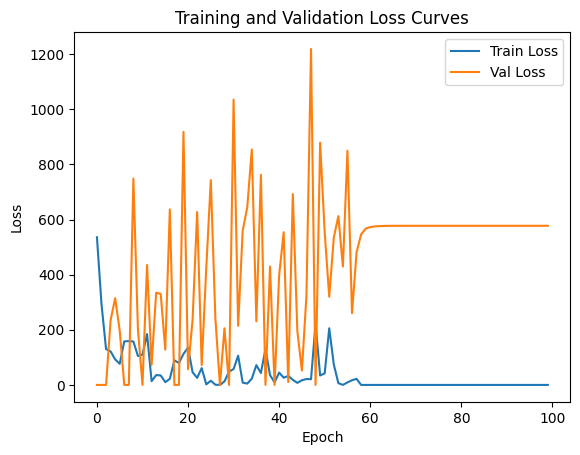

In [51]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

class Classifier(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size1)
        self.fc3 = nn.Linear(hidden_size1, hidden_size2)
        self.fc4 = nn.Linear(hidden_size2, hidden_size2)
        self.fc5 = nn.Linear(hidden_size2, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x

# Define the model
input_size = train_X.shape[1]  # Use the number of features in train_X
hidden_size1 = 256
hidden_size2 = 128
num_classes = 2
model = Classifier(input_size, hidden_size1, hidden_size2, num_classes)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Set the batch size
batch_size = 2

# Training loop
num_epochs = 100
total_samples = len(train_X)  # Define the total number of samples
losses = []  # List to store the training loss values
val_losses = []  # List to store the validation loss values

for epoch in range(num_epochs):
    epoch_loss = 0.0
    epoch_val_loss = 0.0
    num_batches = total_samples // batch_size  # Calculate the number of batches

    for i in range(0, total_samples, batch_size):
        batch_X = torch.Tensor(train_X[i:i+batch_size])  # Convert batch_X to a torch.Tensor
        batch_labels = torch.LongTensor(train_y[i:i+batch_size])  # Convert batch_labels to a torch.LongTensor

        outputs = model(batch_X)  # Forward pass
        loss = criterion(outputs, batch_labels)  # Calculate the training loss
        epoch_loss += loss.item()

        optimizer.zero_grad()  # Zero gradients
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

    # Calculate the validation loss
    with torch.no_grad():
        val_inputs = torch.Tensor(val_X)  # Convert val_X to a torch.Tensor
        val_labels = torch.LongTensor(val_y)  # Convert val_y to a torch.LongTensor
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        epoch_val_loss = val_loss.item()

    average_loss = epoch_loss / num_batches  # Calculate average training loss per epoch
    losses.append(average_loss)  # Append the average training loss to the list
    val_losses.append(epoch_val_loss)  # Append the validation loss to the list

    print(f"Epoch: {epoch+1}, Train Loss: {average_loss}, Val Loss: {epoch_val_loss}")

# Plot the learning loss curves
plt.plot(losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()


In [52]:
with torch.no_grad():
    # Prediction on test_X
    test_inputs = torch.Tensor(test_X)  # Convert test_X to a torch.Tensor
    test_outputs = model(test_inputs)
    test_outputs_softmax = F.softmax(test_outputs, dim=1)  # Apply softmax activation
    test_outputs_argmax = torch.argmax(test_outputs_softmax, dim=1)  # Apply argmax to get labels

    for i in range(len(test_X)):
        element = test_X[i]
        label = test_y[i]
        argmax_value = test_outputs_argmax[i].item()

        predicted_label = argmax_value
        print(f"Label: {label}, Predicted Label: {predicted_label}")

        if predicted_label == 1:
            print('Baby will be a GIRL')
        else:
            print('Baby will be a BOY')


Label: 1, Predicted Label: 1
Baby will be a GIRL
Label: 1, Predicted Label: 1
Baby will be a GIRL


Task 2 involves multiple steps. It begins with data preprocessing, which includes removing features that are irrelevant and using the LeaveOneGroupOut strategy to split the dataset into training, testing, and validation sets. The prediction target in this task is the "sex" feature. Aolso, it was important to splite data currectly. because it is important that all records of each GATE ID, be in just in one splite. therefore, I tried to concat the rows of the data of each mother in a single row and remove unnecessory rows.

For the neural network model, I designed a Multi-Layer Perceptron (MLP) consisting of 5 fully connected layers. The activation function used within the hidden layers is ReLU, while the output layer utilizes Softmax activation. I opted for an MLP since I wasn't certain about the interplay between the features in this particular dataset. To make predictions, the Argmax function is applied to determine the label with the highest probability. Furthermore, a categorical loss function is employed in this model.

In the subsequent analysis, a baseline model employing LINEAR SVC is evaluated using various values of the regularization parameter (c). The accuracy of the baseline model is recorded for each parameter setting. Interestingly, it appears that the neural network outperforms the baseline model in terms of results.

In [57]:
from sklearn.metrics import accuracy_score
start_power = -4
end_power = 5
step_power = 1  # The power by which to increase (e.g., 1 means multiplying by 10)

array = []

power = start_power
while power <= end_power:
    value = 10 ** power
    array.append(value)
    power += step_power

print('Different values of the Parameter: ', array)

from sklearn.exceptions import ConvergenceWarning
import warnings

warnings.filterwarnings("ignore", category=ConvergenceWarning)

acc = []
for c in array:
    LSVC = LinearSVC(C=c, max_iter=2000)  # Increase the max_iter value
    LSVC.fit(train_X, train_y)
    LSVC_predictions = LSVC.predict(train_X)

    # Evaluate the models
    accuracy = accuracy_score(train_y, LSVC_predictions)
    acc.append(accuracy)

print("LSVC Accuracies:", acc, '\n')

Different values of the Parameter:  [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
LSVC Accuracies: [0.6428571428571429, 0.5, 0.5, 0.6428571428571429, 0.6428571428571429, 0.7142857142857143, 0.5, 0.5, 0.5, 0.5] 



### Feedback

Were the tasks above difficult, easy, or a mixture? In both cases, briefly describe why.

The tasks was not difficult. However, they was technical. It is important to undrestand dataset and undrestand its nature. for example, since for each mother there are 4 records, it is important to splite data currectly.

The tasks were not particularly challenging, but they did require technical expertise. Understanding the dataset and its characteristics was crucial. For instance, since there are four records for each mother, it was important to correctly split the data.
